<a href="https://colab.research.google.com/github/metxico/METxico_Systematic_Workflows/blob/main/HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

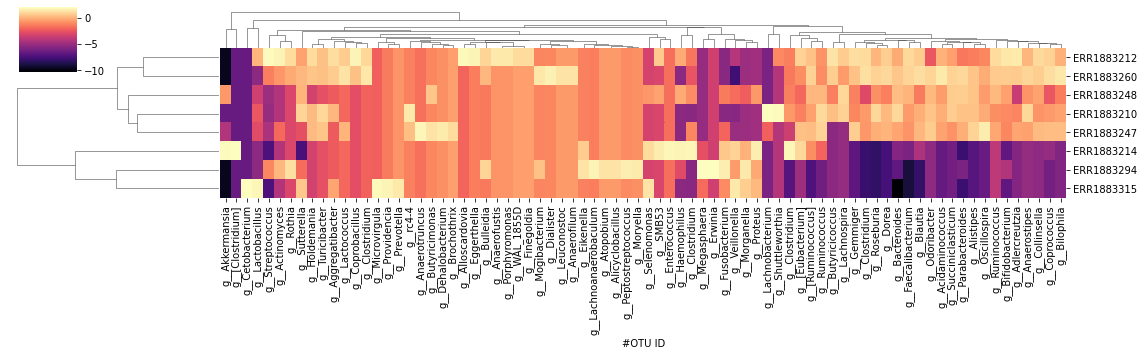

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

abundances = pd.read_table("genus.tsv", skiprows=1, index_col=0)
abundances.index = abundances.index.str.split(";").str[5]  # Use only the genus name
abundances = abundances[~abundances.index.isin(["g__", "__"])]  # remove unclassified genera

# Let's do a centered log-ratio transform: log x_i - log mean(x)
transformed = abundances.apply(
    lambda xs: np.log(xs + 0.5) - np.log(xs.mean() + 0.5),
    axis=1)

sns.clustermap(transformed.T, cmap="magma", xticklabels=True, figsize=(16, 5))